In [78]:
# https://github.com/aladdinpersson/Machine-Learning-Collection/blob/master/ML/Pytorch/Basics/custom_dataset/custom_dataset.py
import torch
import torch.nn as nn  # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions
import torch.optim as optim  # For all Optimization algorithms, SGD, Adam, etc.
import torchvision.transforms as transforms  # Transformations we can perform on our dataset
import torchvision
import os
import pandas as pd
# from skimage import io
from PIL import Image
import matplotlib.pyplot as plt
from torch.utils.data import (
    Dataset,
    DataLoader,
)
import cv2

In [101]:
def imshow(x):
    img = x.data.cpu().permute(1, 2, 0).numpy()
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.axis('off')
    plt.imshow(img)
    plt.show()

In [64]:
class TumorDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_name = self.annotations.id[index] + '.tif'
        img_path = os.path.join(self.root_dir, img_name)
        image = Image.open(img_path)
        y_label = torch.tensor(self.annotations.label[index])

        if self.transform:
            image = self.transform(image)

        return (image, y_label)

In [65]:
DIR = '../../input/'

In [87]:
transform = transforms.Compose([
    transforms.CenterCrop(64),
    transforms.ToTensor(),  
   # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [88]:
dataset = TumorDataset(DIR + 'tumor_train_labels.csv', 
                      DIR + 'tumor_data/', transform=transform)

In [89]:
dataloader = DataLoader(dataset=dataset, 
                        batch_size=32, shuffle=False)

In [90]:
len(dataset)

160000

In [91]:
for i, (data, label) in enumerate(dataloader):
    print(label)
    break

tensor([1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 1])


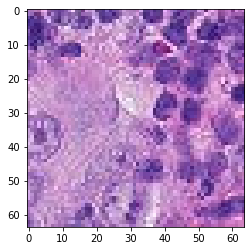

In [99]:
plt.imshow(data[0].permute(1, 2, 0))

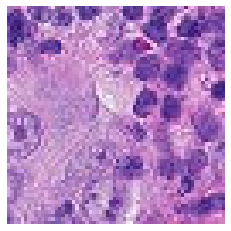

In [102]:
imshow(data[0])

In [97]:
data[0].max(), data[0].min() # no need for more normalization

(tensor(1.), tensor(0.0431))

In [103]:
data.max(), data.min()

(tensor(1.), tensor(0.))

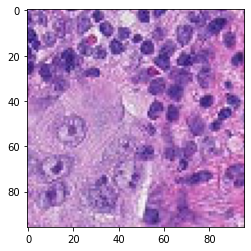

In [86]:
im = plt.imread('../../input/tumor_data/39ca8cf79f1936784afc21435144881db9f36958.tif')
plt.imshow(im)